In [190]:

"""
supp:
y'(t) = f(y(t), t)
y(0) = y_0

discret:
y_{i+1} = y_i + \Delta t f(y_i, t_i), i=0,...,N-1
y(0) = y_0
t_{i+1} - t_i = \Delta t

sample 1d function

input: y0
output: 
    y0, y1, ..., yN
    t0, t1, ..., tN

ex. 1
 - f known explicitely - compare...
 - give model data from y

ex. 2
 - f not know ?
"""

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_10305/2612456422.py:1: SyntaxWarning: invalid escape sequence '\D'
  """


"\nsupp:\ny'(t) = f(y(t), t)\ny(0) = y_0\n\ndiscret:\ny_{i+1} = y_i + \\Delta t f(y_i, t_i), i=0,...,N-1\ny(0) = y_0\nt_{i+1} - t_i = \\Delta t\n\nsample 1d function\n\ninput: y0\noutput: \n    y0, y1, ..., yN\n    t0, t1, ..., tN\n\nex. 1\n - f known explicitely - compare...\n - give model data from y\n\nex. 2\n - f not know ?\n"

In [191]:
import torch

In [ ]:
f = lambda t: -2*t + 1.2
y = lambda t: -t**2 + 1.2*t + 0.1

def Euler(f, y0, t):
    y = torch.zeros_like(t)
    y[0] = y0
    for i in range(len(t)-1):
        # midpoint rule / modified Euler
        y[i+1] = y[i] + (t[i+1]-t[i]) * f((t[i+1]+t[i])/2)
    return y

In [193]:
t_min, t_max = 0, 1.5
ss = 0.1
n_timesteps = 50
t_data = torch.linspace(t_min, t_max, n_timesteps)
y_data = y(t_data)

In [194]:
from matplotlib import pyplot as plt

In [195]:
y_euler = Euler(f, y_data[0], t_data)
y_euler

tensor([ 0.1000,  0.1358,  0.1697,  0.2018,  0.2319,  0.2602,  0.2867,  0.3112,
         0.3339,  0.3547,  0.3736,  0.3907,  0.4059,  0.4192,  0.4306,  0.4402,
         0.4479,  0.4537,  0.4576,  0.4597,  0.4599,  0.4582,  0.4546,  0.4492,
         0.4419,  0.4327,  0.4216,  0.4087,  0.3939,  0.3772,  0.3586,  0.3382,
         0.3159,  0.2917,  0.2657,  0.2378,  0.2080,  0.1763,  0.1427,  0.1073,
         0.0700,  0.0308, -0.0102, -0.0531, -0.0979, -0.1446, -0.1931, -0.2435,
        -0.2958, -0.3500])

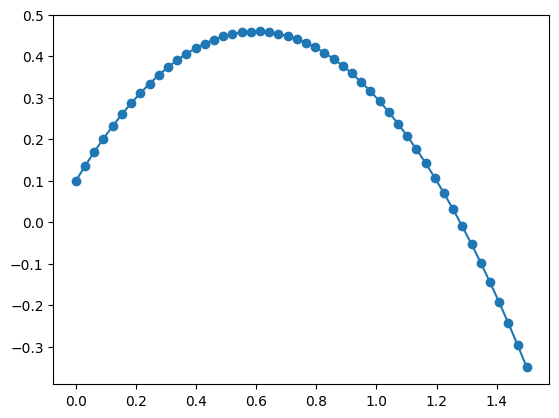

In [196]:
plt.scatter(t_data, y_data)
plt.plot(t_data, y_euler)

In [197]:
n_experiments = 2000
max_err = 0.05
noise = max_err * 2 * (torch.rand(n_experiments, n_timesteps) - 0.5)
Y = noise + y_data

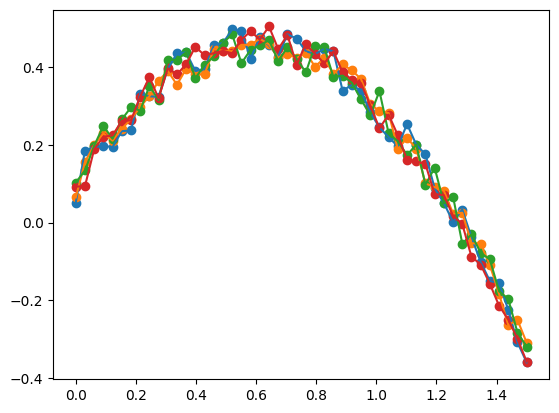

In [198]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n])
    plt.plot(t_data, Y[-n])

dataset: Y = n_experiments x n_timesteps

input:
    for NN: y0
    for ode solver: t_data

output:
    for NN: 

In [199]:
input_size = 1
hidden_size = 10
f_model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
) # t -> f(t)
f_mod_wrap = lambda x: f_model(torch.tensor([x]))
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.001)

Y_preds = torch.zeros_like(Y)
f_model.train()
for e in range(n_experiments):
    y_exper = Y[e]
    y_euler = Euler(f_mod_wrap, y_exper[0], t_data)

    optimizer.zero_grad() # Clear gradients
    loss = 1/n_timesteps * torch.sum((y_euler - y_exper)**2)
    print(loss)
    loss.backward() # Backpropagation
    optimizer.step() # Update weights
    Y_preds[e] = y_euler

tensor(0.0841, grad_fn=<MulBackward0>)
tensor(0.0791, grad_fn=<MulBackward0>)
tensor(0.0779, grad_fn=<MulBackward0>)
tensor(0.0795, grad_fn=<MulBackward0>)
tensor(0.0797, grad_fn=<MulBackward0>)
tensor(0.0701, grad_fn=<MulBackward0>)
tensor(0.0740, grad_fn=<MulBackward0>)
tensor(0.0762, grad_fn=<MulBackward0>)
tensor(0.0764, grad_fn=<MulBackward0>)
tensor(0.0759, grad_fn=<MulBackward0>)
tensor(0.0761, grad_fn=<MulBackward0>)
tensor(0.0735, grad_fn=<MulBackward0>)
tensor(0.0762, grad_fn=<MulBackward0>)
tensor(0.0736, grad_fn=<MulBackward0>)
tensor(0.0767, grad_fn=<MulBackward0>)
tensor(0.0736, grad_fn=<MulBackward0>)
tensor(0.0680, grad_fn=<MulBackward0>)
tensor(0.0772, grad_fn=<MulBackward0>)
tensor(0.0692, grad_fn=<MulBackward0>)
tensor(0.0768, grad_fn=<MulBackward0>)
tensor(0.0681, grad_fn=<MulBackward0>)
tensor(0.0715, grad_fn=<MulBackward0>)
tensor(0.0682, grad_fn=<MulBackward0>)
tensor(0.0680, grad_fn=<MulBackward0>)
tensor(0.0657, grad_fn=<MulBackward0>)
tensor(0.0683, grad_fn=<M

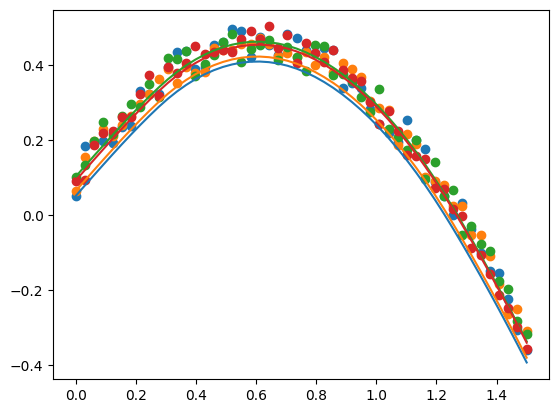

In [200]:
for n in range(1,5):
    plt.scatter(t_data, Y[-n].detach())
    plt.plot(t_data, Y_preds[-n].detach())

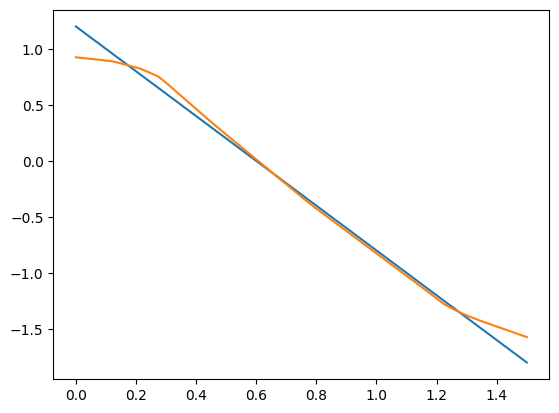

In [201]:
plt.plot(t_data, f(t_data))
plt.plot(t_data, [f_model.forward(torch.tensor([t])).detach() for t in t_data])